# Chapter 3: Neural Networks Backpropagation - Detailed Notes

## 3.0 Introduction to Backpropagation

### What is Backpropagation?
Backpropagation (backward propagation of errors) is the fundamental algorithm behind training neural networks. It efficiently calculates gradients of the loss function with respect to the network weights using the chain rule of calculus.

> 💡 **Key Insight**: Think of backpropagation as a systematic way of answering: "How much did each weight contribute to the error in our prediction?"

## 3.1 Mathematical Framework

### Core Components

1. **Nonlinear Score Function**:
   $s = f(x; W_1, W_2) = W_2 \max(0, W_1x)$
   where:
   - $W_1, W_2$ are weight matrices
   - $\max(0, W_1x)$ is the ReLU activation function
   - ReLU: $f(x) = \begin{cases} x & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases}$

2. **Softmax Loss Function**:
   $L_i = -\log\left(\frac{e^{s_{y_i}}}{\sum_j e^{s_j}}\right)$
   - $s_{y_i}$ is the score for the true class
   - Normalizes scores into probabilities
   - Perfect prediction → Loss = 0
   - Wrong prediction → Loss increases

3. **Regularization Term**:
   $R(W) = \sum_k W_k^2$
   > 🔑 **Important**: This L2 regularization prevents overfitting by penalizing large weights.

4. **Total Loss**:
   $L = \frac{1}{N}\sum_{i=1}^N L_i + \lambda(R(W_1) + R(W_2))$
   where:
   - $N$ is number of training examples
   - $\lambda$ controls regularization strength

## 3.2 Backpropagation Algorithm

### Forward Pass
1. Input → Hidden Layer: $h = \max(0, W_1x)$
2. Hidden → Output: $s = W_2h$
3. Output → Loss: Apply softmax and compute loss

### Backward Pass
Uses chain rule to compute gradients:
$\frac{\partial L}{\partial x} = \frac{\partial L}{\partial q} \cdot \frac{\partial q}{\partial x}$

#### Example: Computing $f(x,y,z) = (x+y)z$

1. First computation: $q = x + y$
   $\frac{\partial q}{\partial x} = 1, \frac{\partial q}{\partial y} = 1$

2. Second computation: $f = qz$
   $\frac{\partial f}{\partial q} = z, \frac{\partial f}{\partial z} = q$

3. Chain Rule Application:
   $\frac{\partial f}{\partial y} = \frac{\partial f}{\partial q} \cdot \frac{\partial q}{\partial y}$

### 📝 Additional Notes

1. **Gradient Flow**: 
   - Forward pass stores intermediate values
   - Backward pass uses these values to compute gradients
   - Each layer's gradients depend on subsequent layers

2. **Activation Functions**:
   - ReLU: Most common, computationally efficient
   - Gradient through ReLU: $\frac{\partial}{\partial x}\max(0,x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x < 0 \end{cases}$

3. **Practical Considerations**:
   - Gradient clipping prevents exploding gradients
   - Batch normalization helps with training stability
   - Proper initialization is crucial for convergence

### 📚 Common Operations and Their Gradients

| Operation | Forward | Backward |
|-----------|---------|----------|
| Add | $q = x + y$ | $\frac{\partial q}{\partial x} = 1$ |
| Multiply | $q = xy$ | $\frac{\partial q}{\partial x} = y$ |
| ReLU | $q = \max(0,x)$ | $\frac{\partial q}{\partial x} = \begin{cases} 1 & x > 0 \\ 0 & x \leq 0 \end{cases}$ |
| Softmax | $q_i = \frac{e^{x_i}}{\sum_j e^{x_j}}$ | $\frac{\partial q_i}{\partial x_j} = q_i(\delta_{ij} - q_j)$ |

### Code Explanation:

1. **Network Architecture**:
   - Input layer: 2 neurons (features)
   - Hidden layer: 3 neurons with ReLU activation
   - Output layer: 2 neurons with Softmax activation

2. **Forward Pass**:
   - $Z_1 = XW_1$
   - $A_1 = \text{ReLU}(Z_1)$
   - $Z_2 = A_1W_2$
   - $A_2 = \text{Softmax}(Z_2)$

3. **Backward Pass**:
   - Computes gradients using chain rule
   - Updates weights with L2 regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from BackPropFunctions import *

Epoch 0, Loss: 0.5260
Epoch 100, Loss: 0.2681
Epoch 200, Loss: 0.2263
Epoch 300, Loss: 0.1884
Epoch 400, Loss: 0.1581
Epoch 500, Loss: 0.1364
Epoch 600, Loss: 0.1212
Epoch 700, Loss: 0.1108
Epoch 800, Loss: 0.1034
Epoch 900, Loss: 0.0982


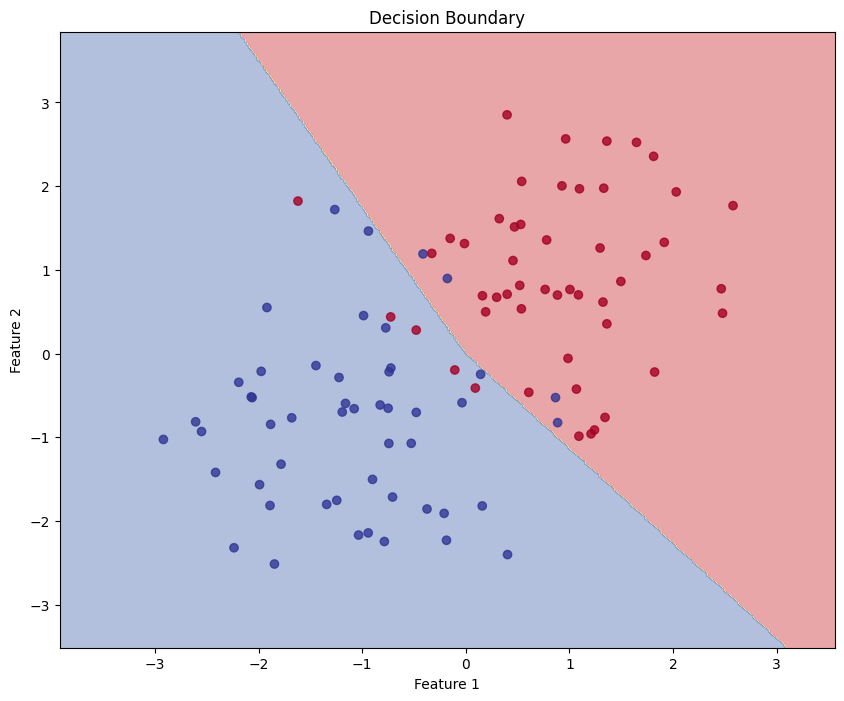

In [11]:
if __name__ == "__main__":
    train_network()

##### 3.2.1 Example: Simple Function Explained Step by Step
**Function Definition**

$f(x, y, z) = (x + y)z$



 1. Forward Pass
- Step 1: Compute q = x + y (gradients flow unchanged)
- Step 2: Compute f = qz (gradients scale by the other term)

 2. Backward Pass (Chain Rule) combines local gradients to get global effect
For each variable, we compute:
- ∂f/∂x = z (gradient through addition and multiplication)
- ∂f/∂y = z (gradient through addition and multiplication)
- ∂f/∂z = x + y = q (gradient through multiplication)

 3. Chain Rule Application
- For x: ∂L/∂x = ∂L/∂f * ∂f/∂x
- For y: ∂L/∂y = ∂L/∂f * ∂f/∂y
- For z: ∂L/∂z = ∂L/∂f * ∂f/∂z

=== Forward Pass ===
Input values: x=2.0, y=3.0, z=4.0
Step 1 - Addition (x + y): 5.0
Step 2 - Multiplication (q * z): 20.0

=== Backward Pass ===
Step 1a - Derivative wrt q (∂f/∂q = z): 0
Step 1b - Derivative wrt z (∂f/∂z = q): 5.0
Step 2a - Derivative wrt x (∂q/∂x): 1
Step 2b - Derivative wrt y (∂q/∂y): 1

Final gradients (after chain rule):
dL/dx: 0.0
dL/dy: 0.0
dL/dz: 5.0

=== Visualization ===


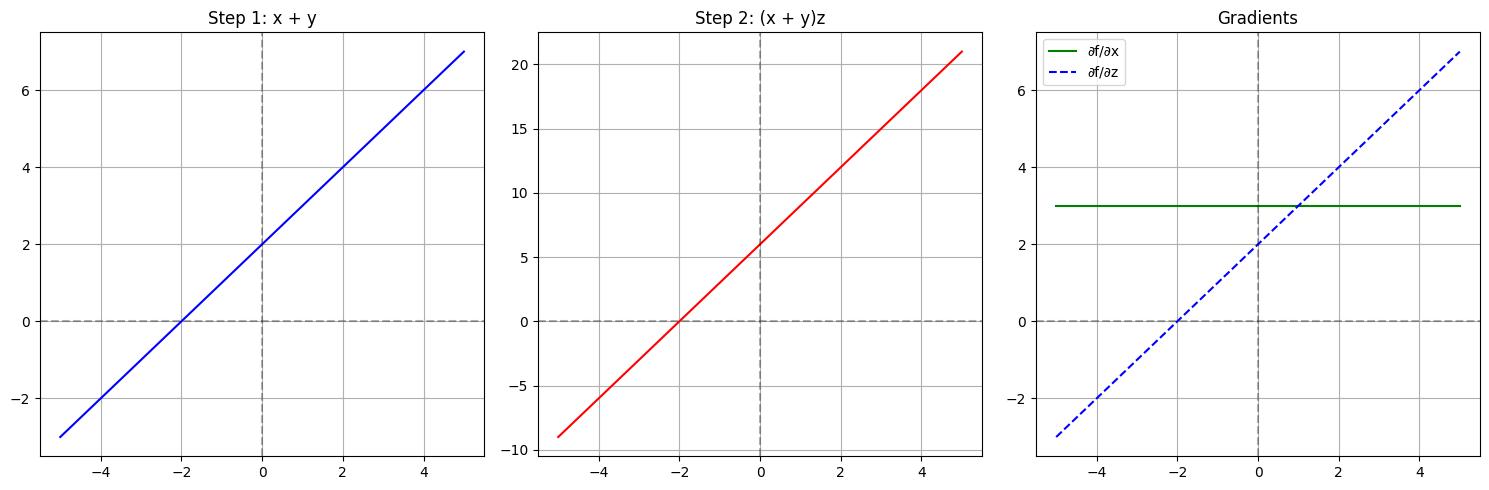


=== Verification ===
f(x,y,z) = (x + y)z = (2.0 + 3.0) * 4.0 = 20.0
Expected gradients:
∂f/∂x = z = 4.0
∂f/∂y = z = 4.0
∂f/∂z = x + y = 5.0


In [ ]:
if __name__ == "__main__":
    run_detailed_example()

 4. Visualization Explained
1. First plot shows the intermediate computation (x + y)
2. Second plot shows the final result (x + y)z
3. Third plot shows how the gradients change with input values

## 3.2.2 Sigmoid Function Example

### The Sigmoid Function
The sigmoid function is defined as:

$f(w, x) = \frac{1}{1 + e^{-(w_0x_0 + w_1x_1 + w_2)}}$

### Forward Pass Components
1. Linear combination: $z = w_0x_0 + w_1x_1 + w_2$
2. Negation: $-z$
3. Exponential: $e^{-z}$
4. Addition: $1 + e^{-z}$
5. Reciprocal: $\frac{1}{1 + e^{-z}}$

### Backward Pass
The gradient is computed using the chain rule:

$\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial x}$

### Sigmoid Derivative

The derivative of the sigmoid function is:
$\frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))$

This comes from:
1. Starting with: $\sigma(x) = \frac{1}{1 + e^{-x}}$
2. Using the chain rule and quotient rule
3. Simplifying to get the elegant form: $\sigma(x)(1 - \sigma(x))$

### Common Derivative Rules
- Exponential: $f(x) = e^x \rightarrow \frac{df}{dx} = e^x$
- Reciprocal: $f(x) = \frac{1}{x} \rightarrow \frac{df}{dx} = -\frac{1}{x^2}$

Forward pass output: 0.4013

Gradients:
dL/dw: [0.24026075 0.48052149 0.24026075]
dL/dx: [ 0.12013037 -0.12013037]


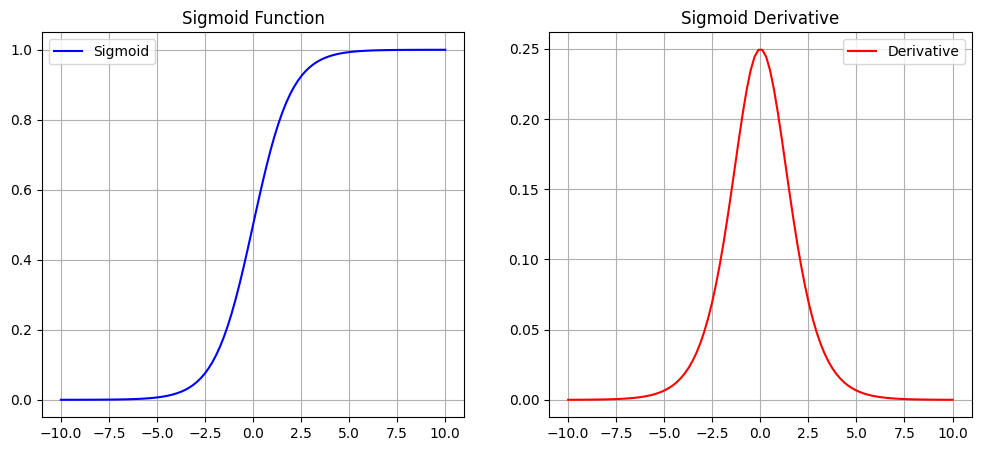

In [7]:
if __name__ == "__main__":
    run_example()

##### Forward Pass:
1. First computation: $z = w_0x_0 + w_1x_1 + w_2$ (linear combination)
2. Second computation: $-z$ (negation)
3. Third computation: $e^{-z}$ (exponential)
4. Fourth computation: $1 + e^{-z}$ (addition)
5. Final computation: $\frac{1}{1 + e^{-z}}$ (reciprocal)

=== Forward Pass ===
Step 1 - Linear combination (z): -0.4
Step 2 - Negation (-z): 0.4
Step 3 - Exponential (e^-z): 1.4918246976412703
Step 4 - Addition (1 + e^-z): 2.4918246976412703
Step 5 - Final sigmoid output: 0.401312339887548

=== Backward Pass ===
Step 1 - Sigmoid derivative: 0.24026074574152914
Step 2 - Gradient w.r.t z: 0.24026074574152914

=== Visualization ===


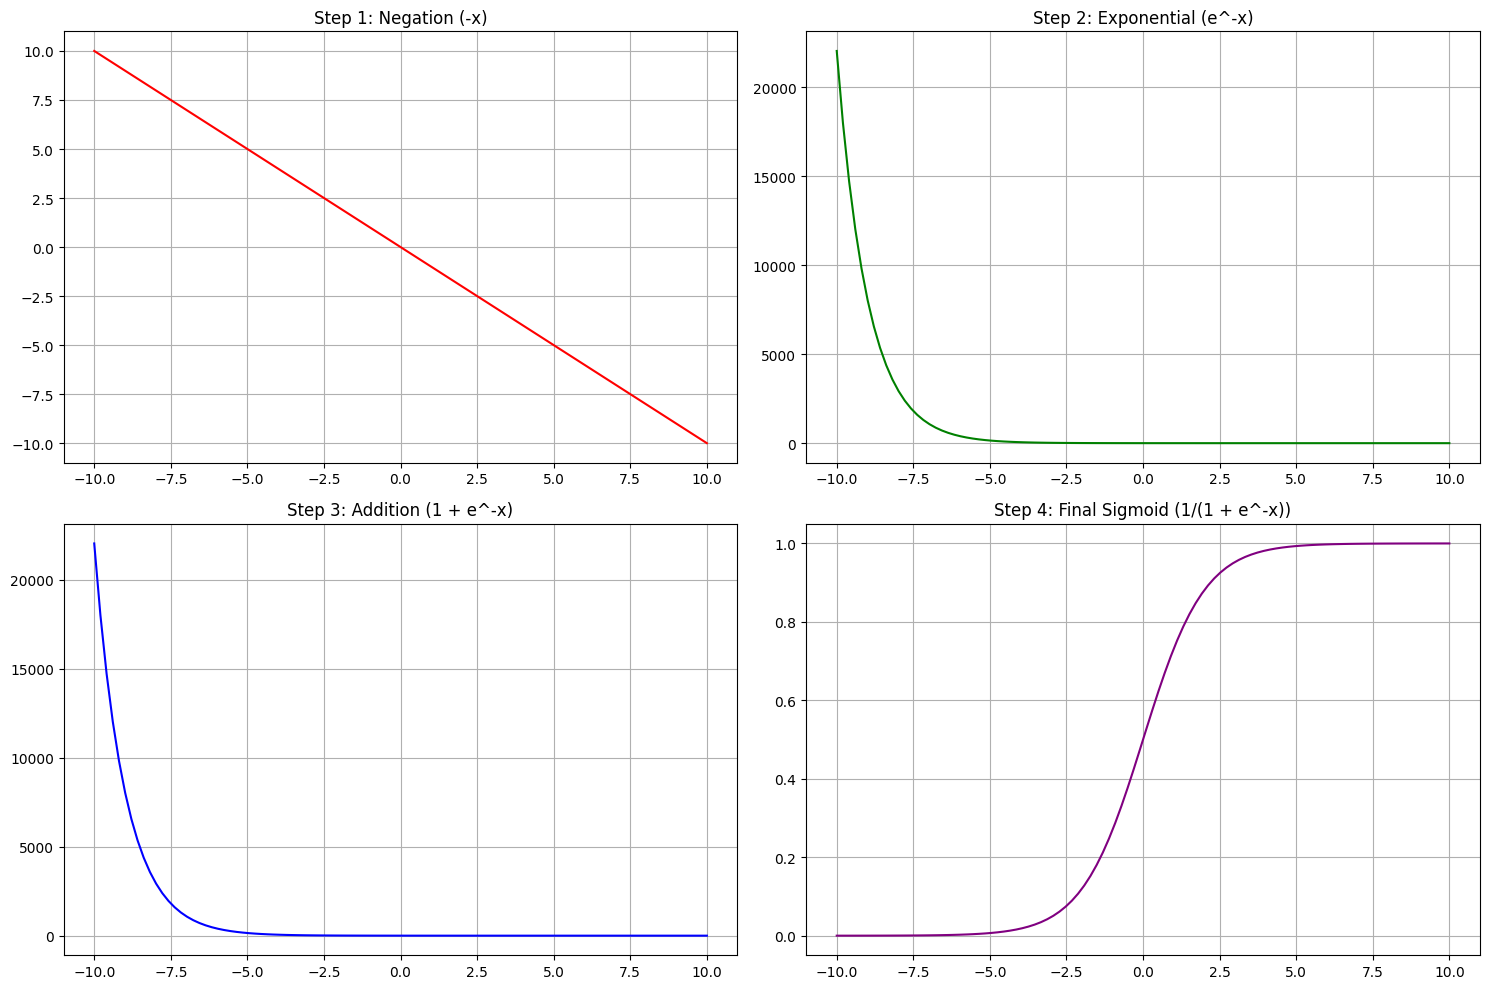

In [8]:
if __name__ == "__main__":
    run_detailed_example()